# 0. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

sns.set_theme()

In [2]:
df = pd.read_csv('data/kill_match_stats_v2.csv')
df.head()

,killed_by,kx,ky,time,vx,vy,dis,phase,type
0,M16A4,4970,3126,1035,4978,3320,194,3.0,AR
1,AKM,4604,4147,1422,4598,4144,7,5.0,AR
2,AKM,4880,3472,1210,4874,3477,8,3.0,AR
3,SKS,5011,4251,1818,4930,4345,124,8.0,DMR
4,M416,4955,4298,1766,4958,4383,85,7.0,AR


## 3.4. Câu hỏi 4
**Câu hỏi:** <span style = "color:red">Những vị trí gây kill thuận lợi gây kill từ xa có thực sự an toàn?</span>

**Ý nghĩa:** Tuy việc biết được các vị trí thuận lợi gây kill từ xa sẽ mang lại lợi thế nhưng các player cũng cần biết tình hình giao tranh tại các khu vực này?

**Phân tích:** Ta có thể biết được phần nào tình hình giao tranh dựa trên phân bố tọa độ của victim 2 chiều như đã làm ở phần trước. Bên cạnh đó ta cũng có thể nhìn sâu hơn, đây là các khu vực thuận lợi gây kill từ xa nên cũng có thể bị gây kill từ xa

In [3]:
img = plt.imread('asset/map/ERANGEL.jpg')

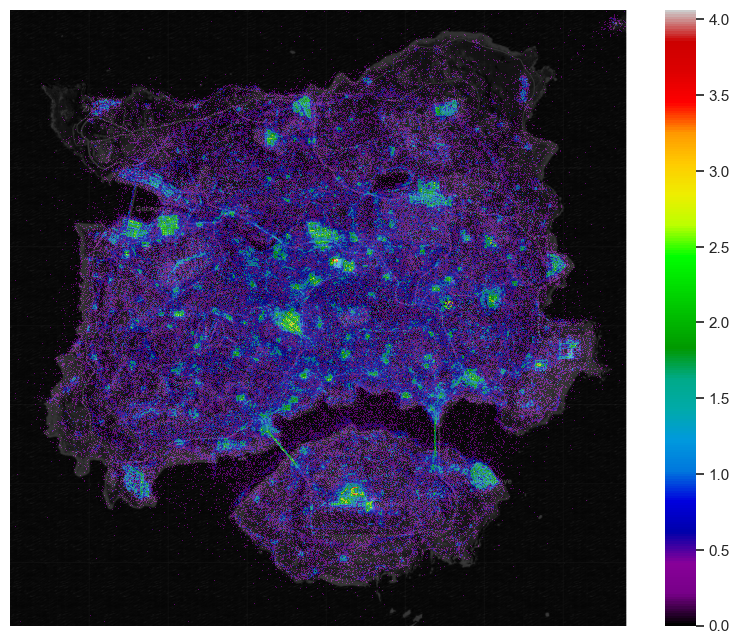

In [4]:
plt.figure(figsize=(10, 8))

number_of_bin = 1600
scale = 1640 * number_of_bin / 1600
plt.imshow(img[::-1, :, 0], extent = [0, scale, 0, scale], alpha = 0.35, zorder = 3, cmap = 'gray')

data = df

ax = sns.heatmap(
    np.log10(plt.hist2d(data['vy'], data['vx'], bins = number_of_bin, range = [[0, 8000], [0, 8000]])[0] + 1), cmap = 'nipy_spectral')
ax.set_aspect('equal')
ax.set_xticklabels([])
ax.set_yticklabels([]);

In [5]:
area_coords = {
    'Bridge1': [[3250, 3650], [5300, 5800]],
    'Bridge2': [[5400, 5600], [5300, 5800]],
    'FishBoneMt': [[2000, 2600], [3100, 3500]],
    'RozhokHill': [[3800, 4200], [3050, 3250]],
    'PochinkiHill': [[3200, 3600], [4300, 4540]],
    'MansionHill': [[5900, 5980], [2940, 3020]],
    'Apartment': [[4350, 4500], [3250, 3400]]
}

In [6]:
filter = (df['dis'] >= 400) & (
          ((df['vx'] >= area_coords['Bridge1'][0][0]) & 
           (df['vx'] <= area_coords['Bridge1'][0][1]) & 
           (df['vy'] >= area_coords['Bridge1'][1][0]) & 
           (df['vy'] <= area_coords['Bridge1'][1][1])) |
          ((df['vx'] >= area_coords['Bridge2'][0][0]) & 
           (df['vx'] <= area_coords['Bridge2'][0][1]) & 
           (df['vy'] >= area_coords['Bridge2'][1][0]) & 
           (df['vy'] <= area_coords['Bridge2'][1][1])) |
          ((df['vx'] >= area_coords['FishBoneMt'][0][0]) & 
           (df['vx'] <= area_coords['FishBoneMt'][0][1]) & 
           (df['vy'] >= area_coords['FishBoneMt'][1][0]) & 
           (df['vy'] <= area_coords['FishBoneMt'][1][1])) |
          ((df['vx'] >= area_coords['RozhokHill'][0][0]) & 
           (df['vx'] <= area_coords['RozhokHill'][0][1]) & 
           (df['vy'] >= area_coords['RozhokHill'][1][0]) & 
           (df['vy'] <= area_coords['RozhokHill'][1][1])) |
          ((df['vx'] >= area_coords['PochinkiHill'][0][0]) & 
           (df['vx'] <= area_coords['PochinkiHill'][0][1]) & 
           (df['vy'] >= area_coords['PochinkiHill'][1][0]) & 
           (df['vy'] <= area_coords['PochinkiHill'][1][1])) |
          ((df['vx'] >= area_coords['MansionHill'][0][0]) & 
           (df['vx'] <= area_coords['MansionHill'][0][1]) & 
           (df['vy'] >= area_coords['MansionHill'][1][0]) & 
           (df['vy'] <= area_coords['MansionHill'][1][1])) |
          ((df['vx'] >= area_coords['Apartment'][0][0]) & 
           (df['vx'] <= area_coords['Apartment'][0][1]) & 
           (df['vy'] >= area_coords['Apartment'][1][0]) & 
           (df['vy'] <= area_coords['Apartment'][1][1])) 
        )

data = df[filter][['kx', 'ky', 'vx', 'vy']] * 0.975

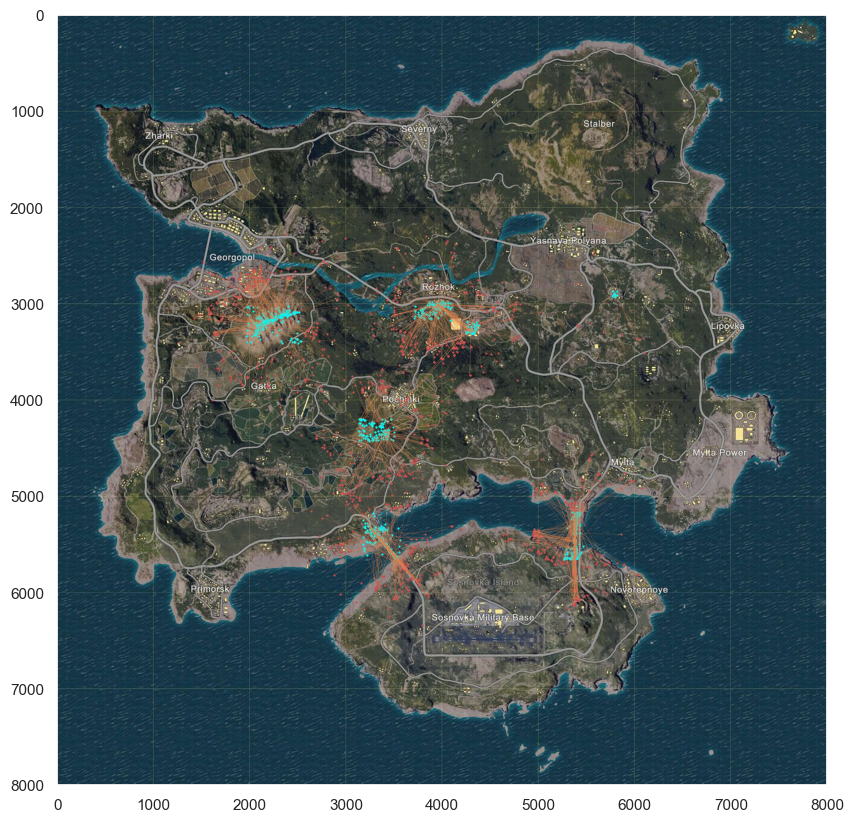

In [7]:
%matplotlib inline

start_time = time.time()

img = plt.imread('asset/map/ERANGEL.jpg')
plt.figure(figsize=(10, 10))

plt.imshow(img, extent = [0, 8000, 0, 8000], origin = 'lower')
ax = sns.scatterplot(x = data['kx'], y = data['ky'], alpha = 1, s = 2, edgecolor = None, color = 'r')
ax = sns.scatterplot(x = data['vx'], y = data['vy'], alpha = 1, s = 2, edgecolor = None, color = 'cyan')

for row in data.iterrows():
    ax.plot([row[1]['kx'], row[1]['vx']], [row[1]['ky'], row[1]['vy']], color = 'C1', alpha = 0.25, linewidth = 0.4)

ax.set_xlabel('')
ax.set_ylabel('')
ax.invert_yaxis()
ax.grid(False)

plt.savefig('temp.png', dpi = 300, bbox_inches = 'tight')